## Analysis part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("eth-donation-requests.json")

In [3]:
df['tagged_begging'] = pd.to_datetime(df['tagged_begging'])

In [4]:
df = df.set_index(pd.DatetimeIndex(df['tagged_begging']))

In [5]:
df = df.groupby(pd.Grouper(key='tagged_begging', freq='15Min', base=0, label='right'))

In [6]:
df = df.describe()

In [7]:
df_count = df.unstack()['tagged_begging']['count']

In [8]:
df_count.iloc[0:10]

tagged_begging
2018-01-01 20:15:00    2
2018-01-01 20:30:00    6
2018-01-01 20:45:00    9
2018-01-01 21:00:00    7
2018-01-01 21:15:00    1
2018-01-01 21:30:00    4
2018-01-01 21:45:00    0
2018-01-01 22:00:00    4
2018-01-01 22:15:00    9
2018-01-01 22:30:00    8
Freq: 15T, dtype: object

In [9]:
df_count.shape

(9788,)

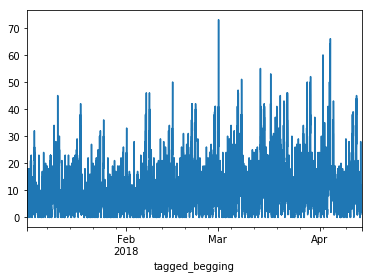

In [10]:
ax = df_count.plot()
plt.show()

#### Zooming in a little bit (month of Feb), it appears to be sinusoidal:

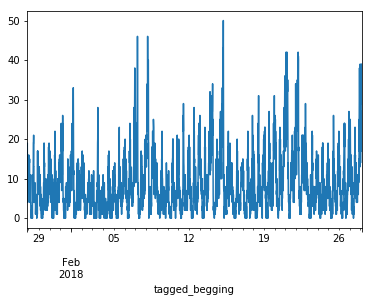

In [11]:
ax = df_count.iloc[2500:5500,].plot()
plt.show()

#### Looking into one week, perhaps a wavelength of 12 hours?

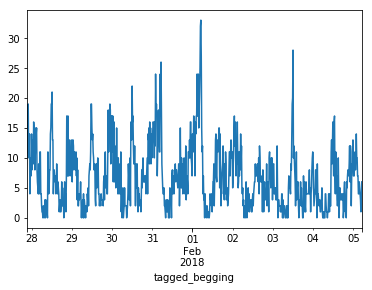

In [12]:
ax = df_count.iloc[2500:3300,].plot()
plt.show()

#### Two-day period:

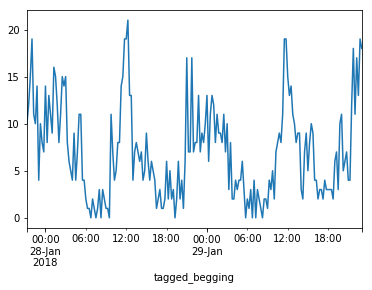

In [13]:
ax = df_count.iloc[2500:2700,].plot()
plt.show()

#### Rolling mean with window of 12 hours:

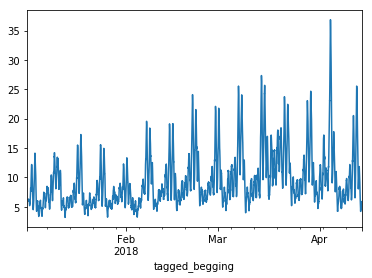

In [14]:
ax = df_count.rolling(48).mean().plot()
plt.show()

#### Zooming in...

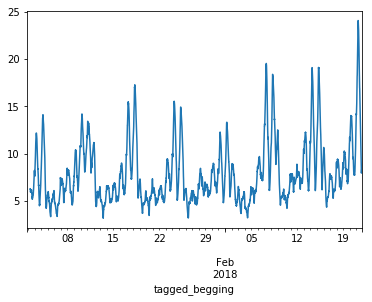

In [15]:
ax = df_count.iloc[0:4894].rolling(48).mean().plot()
plt.show()

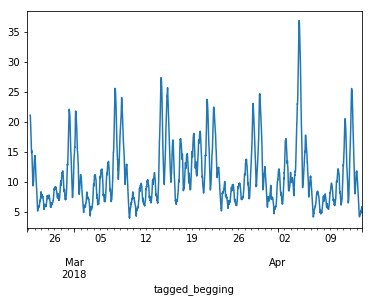

In [16]:
ax = df_count.iloc[4894:9788].rolling(48).mean().plot()
plt.show()

#### Rolling mean with window of one day:

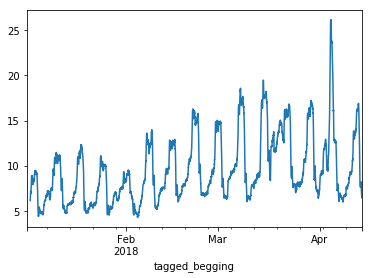

In [17]:
ax = df_count.rolling(96).mean().plot()
plt.show()

#### Zooming in...

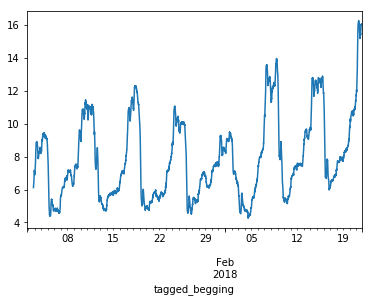

In [18]:
ax = df_count.iloc[0:4894].rolling(96).mean().plot()
plt.show()

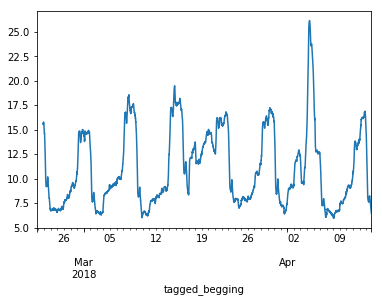

In [19]:
ax = df_count.iloc[4895:9788].rolling(96).mean().plot()
plt.show()

#### ...from above, it appears there is a weekly periodicity to the fluctuations

#### Using a window of one week:

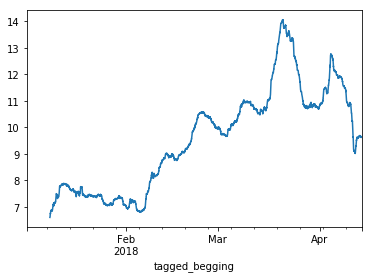

In [20]:
ax = df_count.rolling(672).mean().plot()
plt.show()

#### A window of one month:

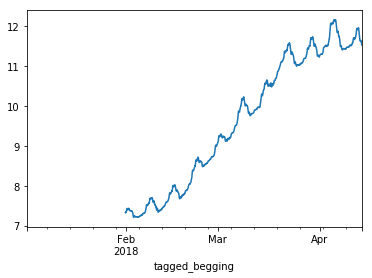

In [21]:
ax = df_count.rolling(2880).mean().plot()
plt.show()

#### ...smoothing out the weekly/daily periodicities, there appears to be a gradual linear increase in counts

## Conclusion

The visual analysis suggests a time series that could be modeled as consisting of 4 sub-components:

- 12 hour sinusoid
- 1 week sinusoid
- Linear function
- Noise

...with daily troughs centered around 6 a.m./p.m. and crests centered around 12 a.m./p.m.

...and weekly troughs happening around Sunday, and crests happening Wed/Thurs


Further information (e.g. data about actual ETH addrs for each timestamp) would be very helpful to draw additional conclusions